In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [34]:
# Locate the CSV file to be read.
spotify_data_path = "Resources/data.csv"

# Read the Spotify songs data.
spotify_data = pd.read_csv(spotify_data_path)

In [35]:
smaller_df = spotify_data[["name", "artists", "year", "popularity"]]
smaller_df

,name,artists,year,popularity
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4
1,Clancy Lowered the Boom,['Dennis Day'],1921,5
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5
3,Danny Boy,['Frank Parker'],1921,3
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2
...,...,...,...,...
170648,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72
170649,Halloweenie III: Seven Days,['Ashnikko'],2020,68
170650,AYA,['MAMAMOO'],2020,76
170651,Darkness,['Eminem'],2020,70


In [36]:
# Establish the bins.
decade_bins = [1921, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2020]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "2000s", "2010s","2020s"]

In [37]:
# Use "pd.cut" to categorize popularity based on the bins.
smaller_df["Decade"] = pd.cut(smaller_df["year"], decade_bins, labels=labels, include_lowest=True)
smaller_df

C:\Users\16626\AppData\Local\Temp\ipykernel_14408\2707837629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller_df["Decade"] = pd.cut(smaller_df["year"], decade_bins, labels=labels, include_lowest=True)


,name,artists,year,popularity,Decade
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s
3,Danny Boy,['Frank Parker'],1921,3,20s
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s
...,...,...,...,...,...
170648,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72,2020s
170649,Halloweenie III: Seven Days,['Ashnikko'],2020,68,2020s
170650,AYA,['MAMAMOO'],2020,76,2020s
170651,Darkness,['Eminem'],2020,70,2020s


In [38]:
# Group by "Decade" and find the mean popularity of songs for each decade.
decade_popularity = pd.DataFrame(smaller_df.groupby(["Decade"]).mean()["popularity"])
decade_popularity

,popularity
Decade,
20s,1.304331
30s,2.536601
40s,1.876252
50s,10.692091
60s,26.551742
70s,35.055800
80s,37.523426
90s,44.192252
2000s,49.734348


In [39]:
# Add the Instrumentalness, Loudness, and Acousticness columns to the "smaller_df" DataFrame and match them by index.
decade_with_variables = pd.merge(smaller_df, spotify_data[["instrumentalness", "loudness", "acousticness","liveness","energy","tempo","speechiness","mode","key","explicit","duration_ms","danceability","valence"]], left_index=True, right_index=True)
decade_with_variables.head()

,name,artists,year,popularity,Decade,instrumentalness,loudness,acousticness,liveness,energy,tempo,speechiness,mode,key,explicit,duration_ms,danceability,valence
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s,0.878000,-20.096,0.982,0.665,0.211,80.954,0.0366,1,10,0,831667,0.279,0.0594
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s,0.000000,-12.441,0.732,0.160,0.341,60.936,0.4150,1,7,0,180533,0.819,0.9630
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s,0.913000,-14.850,0.961,0.101,0.166,110.339,0.0339,1,3,0,500062,0.328,0.0394
3,Danny Boy,['Frank Parker'],1921,3,20s,0.000028,-9.316,0.967,0.381,0.309,100.109,0.0354,1,5,0,210000,0.275,0.1650
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s,0.000002,-10.096,0.957,0.229,0.193,101.665,0.0380,1,3,0,166693,0.418,0.2530


In [40]:
# Figure out the mean instrumentalness for each decade.
decade_instrumentalness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["instrumentalness"])
decade_instrumentalness

,instrumentalness
Decade,
20s,0.377181
30s,0.276707
40s,0.363176
50s,0.247795
60s,0.157578
70s,0.116031
80s,0.122269
90s,0.109744
2000s,0.083848


In [41]:
# Figure out the mean loudness for each decade.
decade_loudness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["loudness"])
decade_loudness

,loudness
Decade,
20s,-16.699090
30s,-14.214586
40s,-15.331419
50s,-14.731226
60s,-12.676736
70s,-11.424966
80s,-11.226990
90s,-10.004415
2000s,-7.501916


In [42]:
# Figure out the mean acousticness for each decade.
decade_acousticness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["acousticness"])
decade_acousticness

,acousticness
Decade,
20s,0.801554
30s,0.867694
40s,0.870974
50s,0.840334
60s,0.624013
70s,0.400162
80s,0.298634
90s,0.307533
2000s,0.269761


In [43]:
# Figure out the mean liveness for each decade.
decade_liveness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["liveness"])
decade_liveness

,liveness
Decade,
20s,0.210910
30s,0.225639
40s,0.221343
50s,0.209219
60s,0.208687
70s,0.216406
80s,0.204639
90s,0.196547
2000s,0.195582


In [44]:
# Figure out the mean energy for each decade.
decade_energy = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["energy"])
decade_energy

,energy
Decade,
20s,0.235133
30s,0.286655
40s,0.254896
50s,0.286753
60s,0.414520
70s,0.533716
80s,0.594715
90s,0.586066
2000s,0.651586


In [45]:
# Figure out the mean tempo for each decade.
decade_tempo = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["tempo"])
decade_tempo

,tempo
Decade,
20s,110.431253
30s,111.545690
40s,107.379639
50s,110.972049
60s,115.166468
70s,119.858574
80s,121.345255
90s,119.404234
2000s,121.254695


In [46]:
# Figure out the mean speechiness for each decade.
decade_speechiness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["speechiness"])
decade_speechiness

,speechiness
Decade,
20s,0.291475
30s,0.204065
40s,0.153847
50s,0.093679
60s,0.057731
70s,0.059764
80s,0.062035
90s,0.080528
2000s,0.087719


In [47]:
# Figure out the mean mode for each decade.
decade_mode = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["mode"])
decade_mode

,mode
Decade,
20s,0.694108
30s,0.693266
40s,0.702042
50s,0.710882
60s,0.753952
70s,0.743200
80s,0.709874
90s,0.723079
2000s,0.685483


In [48]:
# Figure out the mean key for each decade.
decade_key = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["key"])
decade_key

,key
Decade,
20s,5.405579
30s,5.310713
40s,5.178697
50s,5.030227
60s,5.107269
70s,5.088750
80s,5.270932
90s,5.330235
2000s,5.282297


In [49]:
# Figure out the Count explicit for each decade.
decade_explicit = pd.DataFrame(decade_with_variables.groupby(["Decade"]).count()["explicit"])
decade_explicit

,explicit
Decade,
20s,5126
30s,9549
40s,15378
50s,19850
60s,19549
70s,20000
80s,19850
90s,19901
2000s,19646


In [60]:
# Figure out the mean duration_ms for each decade.
decade_duration_ms = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["duration_ms"])
decade_duration_sec = decade_duration_ms/1000
decade_duration_sec

,duration_ms
Decade,
20s,183.769229
30s,207.616600
40s,217.894654
50s,220.482874
60s,211.668431
70s,254.051705
80s,252.120366
90s,248.595563
2000s,239.517407


In [61]:
# Figure out the mean danceability for each decade.
decade_danceability = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["danceability"])
decade_danceability

,danceability
Decade,
20s,0.586963
30s,0.541664
40s,0.473476
50s,0.476858
60s,0.494697
70s,0.524927
80s,0.546385
90s,0.566082
2000s,0.574142


In [62]:
# Figure out the mean valence for each decade.
decade_valence = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["valence"])
decade_valence

,valence
Decade,
20s,0.542143
30s,0.567896
40s,0.487830
50s,0.478597
60s,0.551939
70s,0.585098
80s,0.564420
90s,0.544997
2000s,0.530295


# Graphing Data

## By Decade

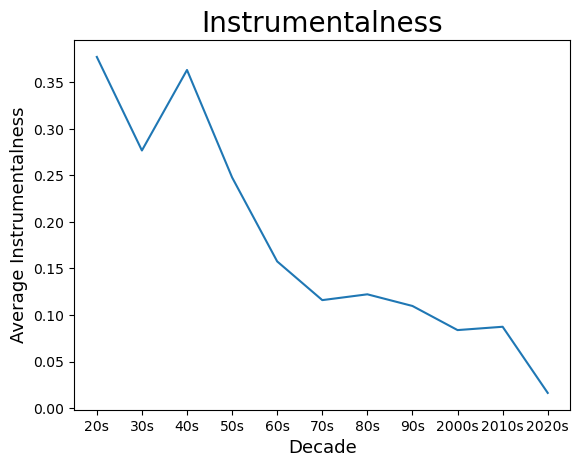

In [63]:
plt.plot(labels, decade_instrumentalness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Instrumentalness", fontdict={"fontsize": 13})
plt.title("Instrumentalness", fontdict={"fontsize": 20})
plt.show()

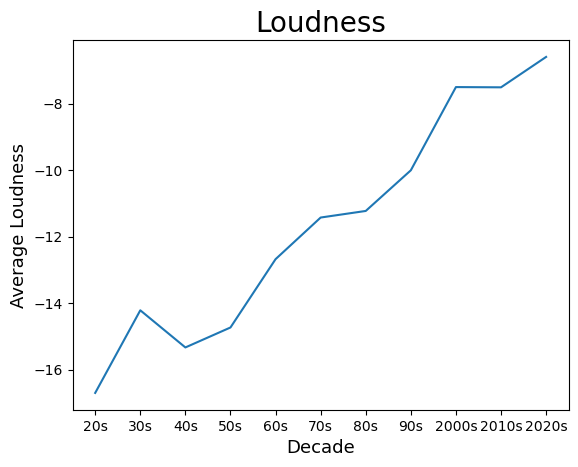

In [64]:
plt.plot(labels, decade_loudness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Loudness", fontdict={"fontsize": 13})
plt.title("Loudness", fontdict={"fontsize": 20})
plt.show()

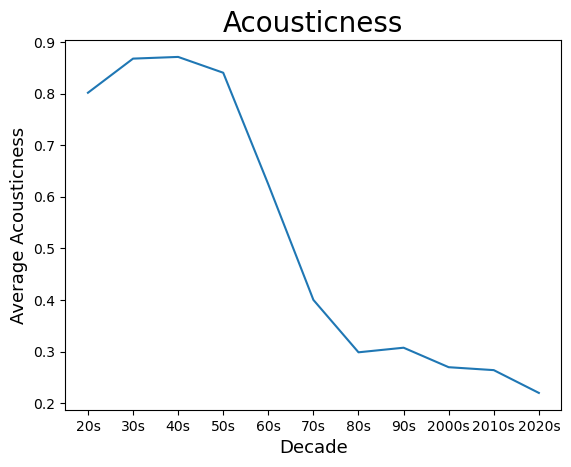

In [65]:
plt.plot(labels, decade_acousticness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Acousticness", fontdict={"fontsize": 13})
plt.title("Acousticness", fontdict={"fontsize": 20})
plt.show()

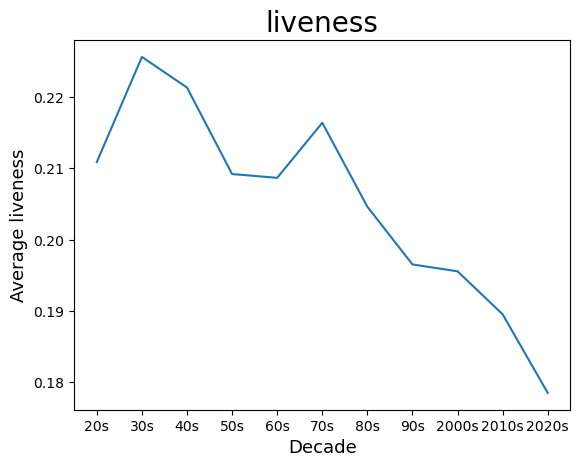

In [66]:
plt.plot(labels, decade_liveness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average liveness", fontdict={"fontsize": 13})
plt.title("liveness", fontdict={"fontsize": 20})
plt.show()

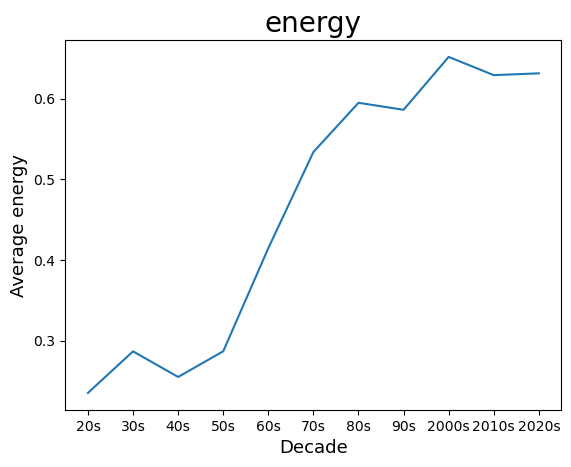

In [67]:
plt.plot(labels, decade_energy)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average energy", fontdict={"fontsize": 13})
plt.title("energy", fontdict={"fontsize": 20})
plt.show()

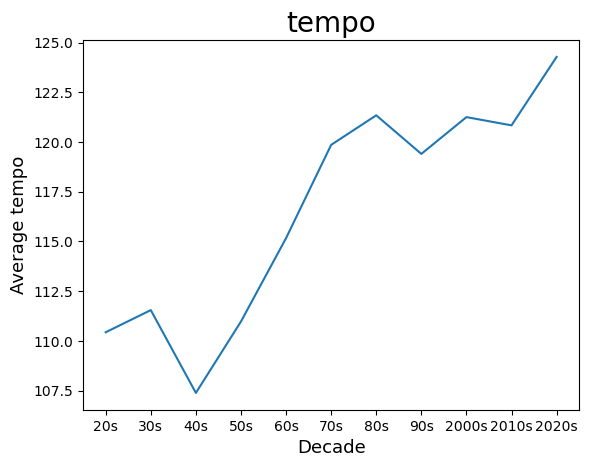

In [68]:
plt.plot(labels, decade_tempo)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average tempo", fontdict={"fontsize": 13})
plt.title("tempo", fontdict={"fontsize": 20})
plt.show()

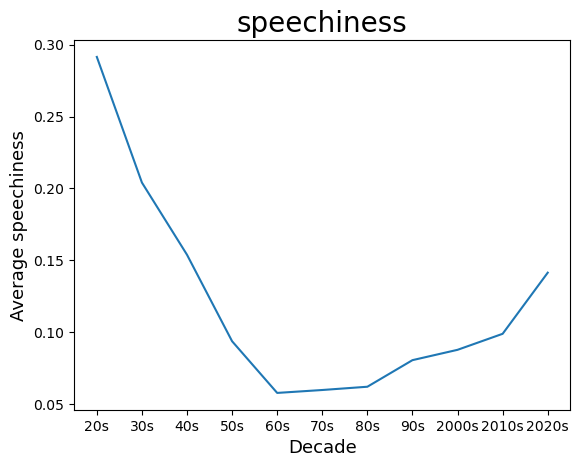

In [69]:
plt.plot(labels, decade_speechiness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average speechiness", fontdict={"fontsize": 13})
plt.title("speechiness", fontdict={"fontsize": 20})
plt.show()

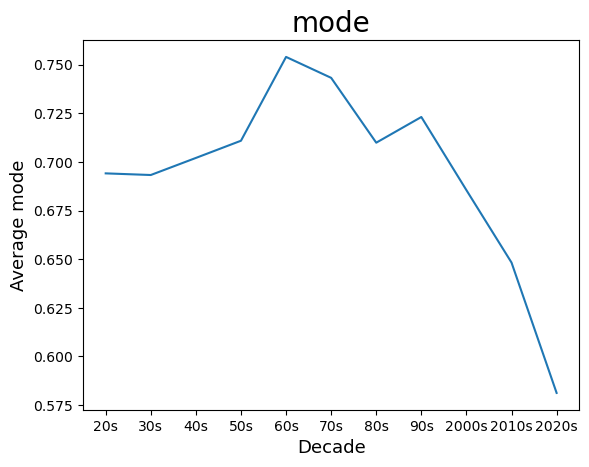

In [70]:
plt.plot(labels, decade_mode)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average mode", fontdict={"fontsize": 13})
plt.title("mode", fontdict={"fontsize": 20})
plt.show()

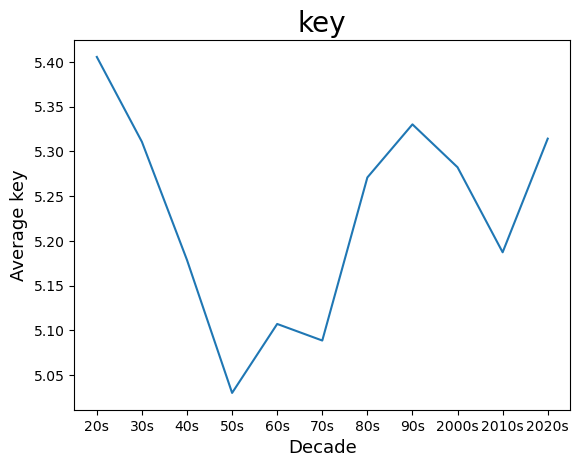

In [71]:
plt.plot(labels, decade_key)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average key", fontdict={"fontsize": 13})
plt.title("key", fontdict={"fontsize": 20})
plt.show()

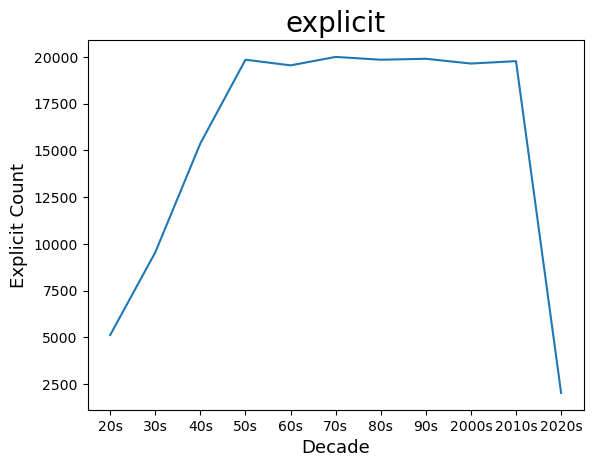

In [72]:
plt.plot(labels, decade_explicit)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Explicit Count", fontdict={"fontsize": 13})
plt.title("explicit", fontdict={"fontsize": 20})
plt.show()

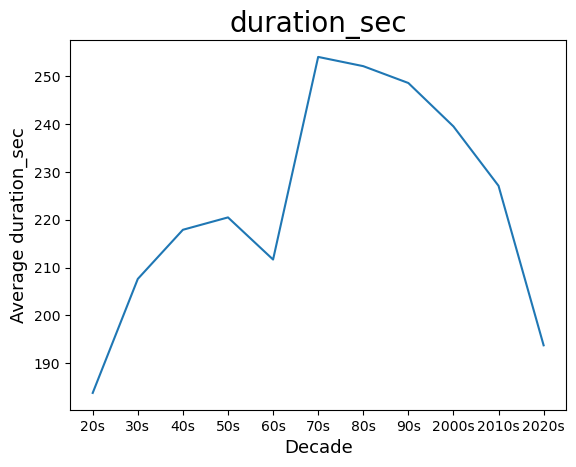

In [78]:
plt.plot(labels, decade_duration_sec)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average duration_sec", fontdict={"fontsize": 13})
plt.title("duration_sec", fontdict={"fontsize": 20})
plt.show()

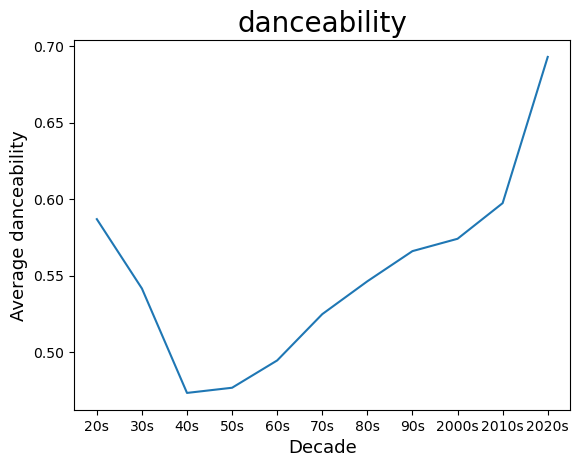

In [79]:
plt.plot(labels, decade_danceability)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average danceability", fontdict={"fontsize": 13})
plt.title("danceability", fontdict={"fontsize": 20})
plt.show()

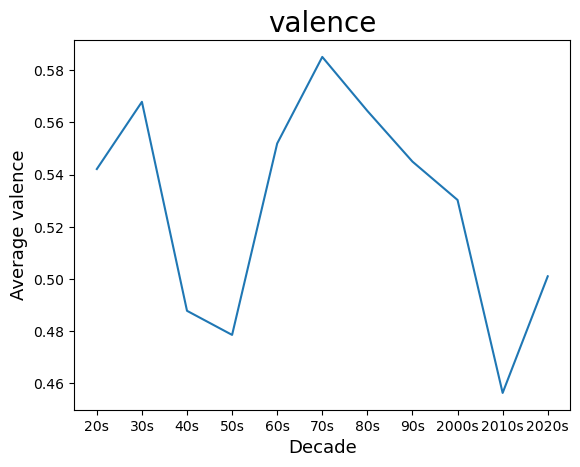

In [80]:
plt.plot(labels, decade_valence)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average valence", fontdict={"fontsize": 13})
plt.title("valence", fontdict={"fontsize": 20})
plt.show()